# Ensemble Techniques Project

#### (Naveen Pete, PGP-AIML Online August 20-A)

## Data Description & Context

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

## Domain
Medicine

## Attribute Information
- **name** - ASCII subject name and recording number
- **MDVP:Fo(Hz)** - Average vocal fundamental frequency
- **MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency
- **MDVP:Flo(Hz)** - Minimum vocal fundamental frequency
- **MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP** - Several measures of variation in fundamental frequency
- **MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA** - Several measures of variation in amplitude
- **NHR, HNR** - Two measures of ratio of noise to tonal components in the voice
- **status** - Health status of the subject (one) - Parkinson's, (zero) - healthy
- **RPDE, D2** - Two nonlinear dynamical complexity measures
- **DFA** - Signal fractal scaling exponent
- **spread1,spread2, PPE** - Three nonlinear measures of fundamental frequency variation 9. car name: string (unique for each instance)

## Learning Outcomes
- Exploratory Data Analysis
- Supervised Learning
- Ensemble Learning

## Objective
Goal is to classify the patients into the respective labels using the attributes from their voice recordings.

### Import the necessary libraries

In [1]:
# Libraries needed for scientific computation, data analysis and manipulation
import numpy as np
import pandas as pd

# Libraries needed for statistical data visualization
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

## 1. Load the dataset

In [2]:
# Initialize dataframe with Parkinsons dataset
main_df = pd.read_csv("Data - Parkinsons")

## 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard (5 points)

### Get a feel of the data

In [3]:
main_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
main_df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


### Count number of rows (records) & columns (attributes or features) in the dataset

In [5]:
row_count, column_count = main_df.shape

print(f'No. of rows: {row_count}')
print(f'No. of columns: {column_count}')

No. of rows: 195
No. of columns: 24


### Understand the structure of the dataset and the type of attributes within it 

In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

**Observations**
- There are 195 rows and 24 columns in the dataset
- All the columns except 'name' are numerical
- 'name' column is of 'object' type. Probably it contains the name of the person
- 'status' column is the dependent variable in the dataset 

### Check the presence of missing values

In [7]:
main_df.isnull().apply(pd.value_counts)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
False,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195


In [8]:
main_df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**Observations**
- There are no missing / null values in the dataset. All rows and colums contain data

### Check the presence of zero (0) value within any of the columns

In [9]:
# function to check if any of the columns contain 0 as value 
def check_for_zero_values():
    for col in main_df.columns:
        col_type = main_df[col].dtypes
        if col_type != 'object':
            print(col, '-', main_df[main_df[col]==0][col].count())
        
check_for_zero_values()

MDVP:Fo(Hz) - 0
MDVP:Fhi(Hz) - 0
MDVP:Flo(Hz) - 0
MDVP:Jitter(%) - 0
MDVP:Jitter(Abs) - 0
MDVP:RAP - 0
MDVP:PPQ - 0
Jitter:DDP - 0
MDVP:Shimmer - 0
MDVP:Shimmer(dB) - 0
Shimmer:APQ3 - 0
Shimmer:APQ5 - 0
MDVP:APQ - 0
Shimmer:DDA - 0
NHR - 0
HNR - 0
status - 48
RPDE - 0
DFA - 0
spread1 - 0
spread2 - 0
D2 - 0
PPE - 0


In [10]:
main_df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

**Observations**
- None of the columns contain a 0 value except 'status' column
- 147 rows contain a 'status' of 1 indicating the presence of Parkinson's Disease; 48 rows contain a 'status' of 0 indicating that the individual is healthy

## 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations (15 points)

In [11]:
main_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,195,195,phon_R01_S35_5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Fo(Hz),195,NaN,NaN,NaN,154.229,41.3901,88.333,117.572,148.79,182.769,260.105
MDVP:Fhi(Hz),195,NaN,NaN,NaN,197.105,91.4915,102.145,134.863,175.829,224.206,592.03
MDVP:Flo(Hz),195,NaN,NaN,NaN,116.325,43.5214,65.476,84.291,104.315,140.019,239.17
MDVP:Jitter(%),195,NaN,NaN,NaN,0.00622046,0.00484813,0.00168,0.00346,0.00494,0.007365,0.03316
MDVP:Jitter(Abs),195,NaN,NaN,NaN,4.3959e-05,3.48219e-05,7e-06,2e-05,3e-05,6e-05,0.00026
MDVP:RAP,195,NaN,NaN,NaN,0.00330641,0.00296777,0.00068,0.00166,0.0025,0.003835,0.02144
MDVP:PPQ,195,NaN,NaN,NaN,0.00344636,0.00275898,0.00092,0.00186,0.00269,0.003955,0.01958
Jitter:DDP,195,NaN,NaN,NaN,0.00991995,0.00890334,0.00204,0.004985,0.00749,0.011505,0.06433
MDVP:Shimmer,195,NaN,NaN,NaN,0.0297091,0.0188569,0.00954,0.016505,0.02297,0.037885,0.11908


**Observations**
- 'name' column may not be required for further analysis. It can probably be dropped

In [12]:
main_df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [13]:
# dividing dataset columns into 3 sets
col_set1 = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 
            'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3']
col_set2 = ['Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
col_output = ['status']

In [14]:
# function to plot the distribution of numeric columns 
def plot_distribution(columns):
    for col in columns:
        if(col == 'MDVP:Jitter(Abs)'):
            sns.displot(data=main_df, kind='hist', x=col, bins=20)
        else:
            sns.displot(data=main_df, kind='hist', x=col, bins=20, kde=True)

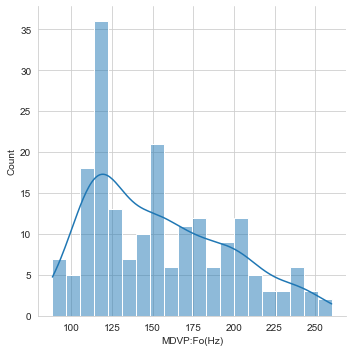

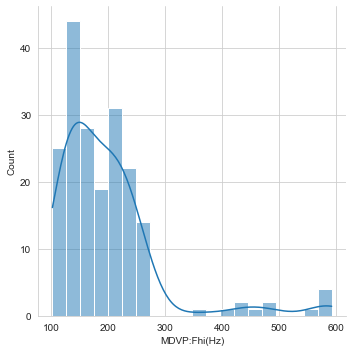

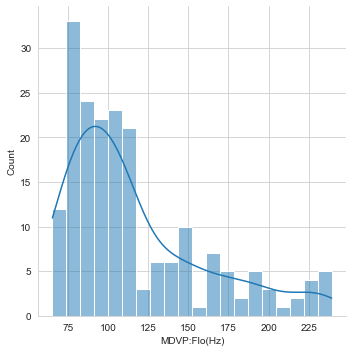

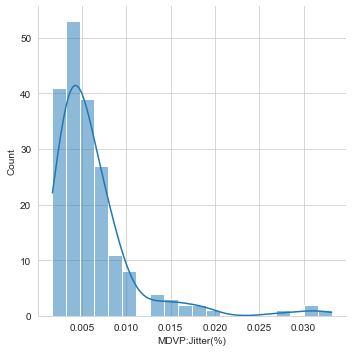

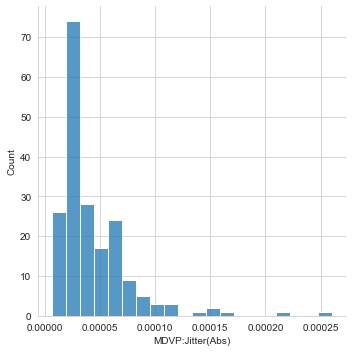

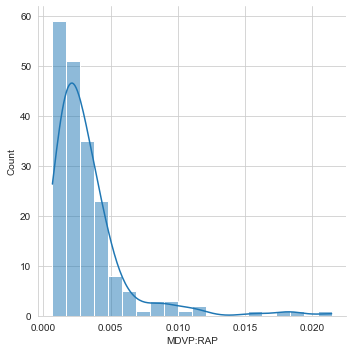

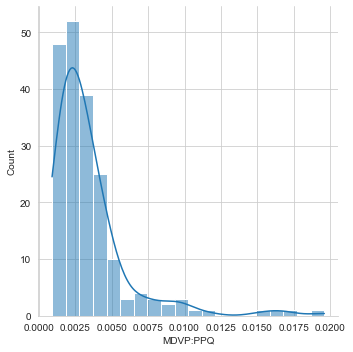

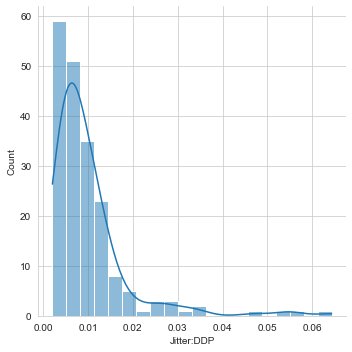

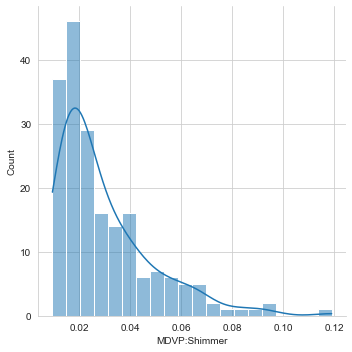

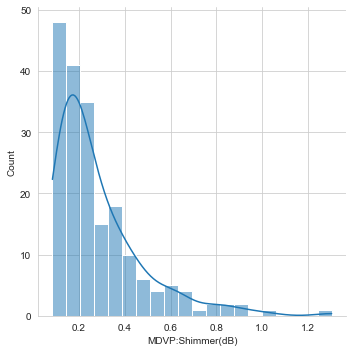

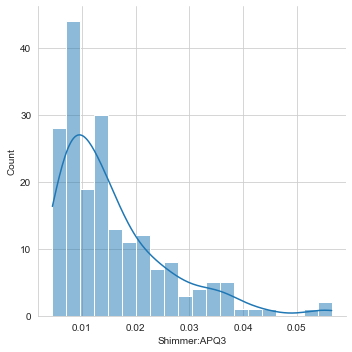

In [15]:
plot_distribution(col_set1)

**Observations**
- **MDVP:Fo(Hz)** - data is right-skewed, looks like the data contains multiple modes
- **MDVP:Fhi(Hz)** - data is right-skewed, looks like the data contains outliers
- **MDVP:Flo(Hz)** - data is right-skewed
- **MDVP:Jitter(%)** - data is right-skewed, looks like the data contains outliers
- **MDVP:Jitter(Abs)** -  data is right-skewed, data values are very small, looks like the data contains outliers
- **MDVP:RAP** - data is right-skewed, looks like the data contains outliers
- **MDVP:PPQ** - data is right-skewed, looks like the data contains outliers
- **Jitter:DDP** - data is right-skewed, looks like the data contains outliers
- **MDVP:Shimmer** - data is right-skewed, looks like the data contains outliers
- **MDVP:Shimmer(dB)** - data is right-skewed, looks like the data contains outliers
- **Shimmer:APQ3** - data is right-skewed, looks like the data contains outliers

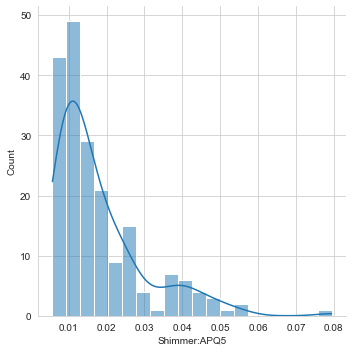

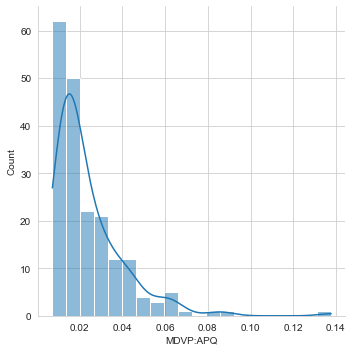

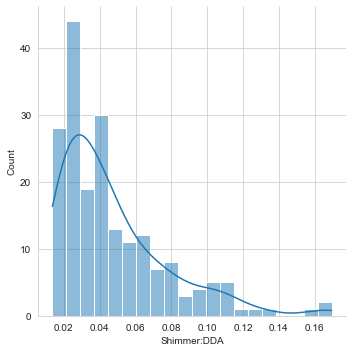

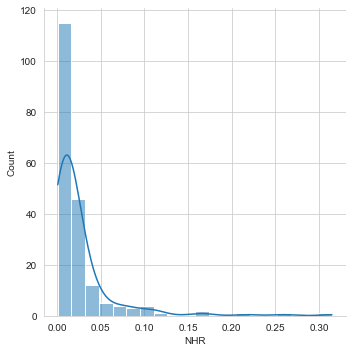

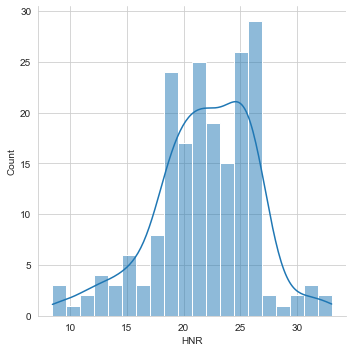

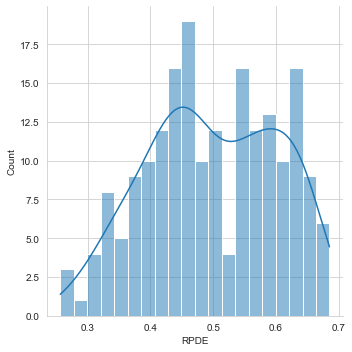

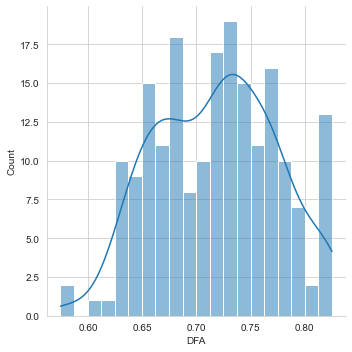

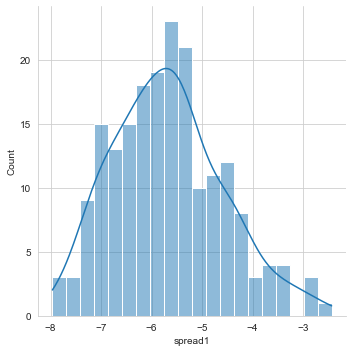

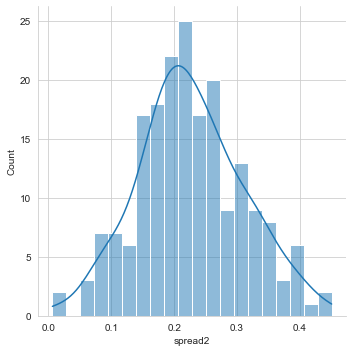

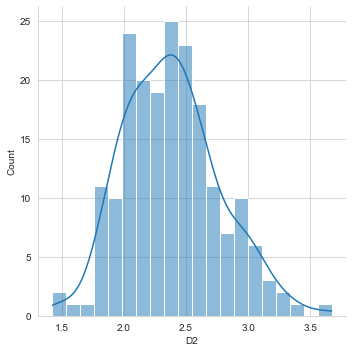

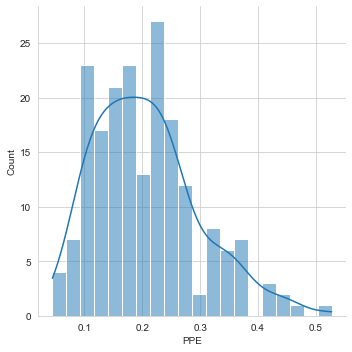

In [16]:
plot_distribution(col_set2)

**Observations**
- **Shimmer:APQ5** - data is right-skewed, looks like the data contains multiple modes
- **MDVP:APQ** - data is right-skewed, looks like the data contains outliers
- **Shimmer:DDA** - data is right-skewed
- **NHR** - data is right-skewed, looks like the data contains outliers
- **HNR** - data is mostly normally distributed
- **RPDE** - data is mostly normally distributed
- **DFA** - data is mostly normally distributed
- **spread1** - data is mostly normally distributed
- **spread2** - data is mostly normally distributed
- **D2** - data is mostly normally distributed
- **PPE** - data is mostly normally distributed

### Target column distribution and observations

In [17]:
main_df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

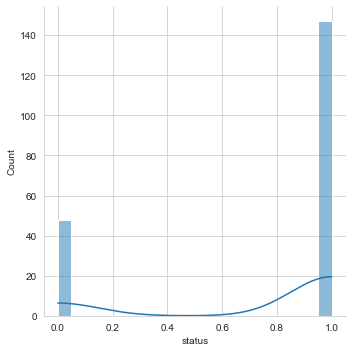

In [18]:
plot_distribution(col_output)

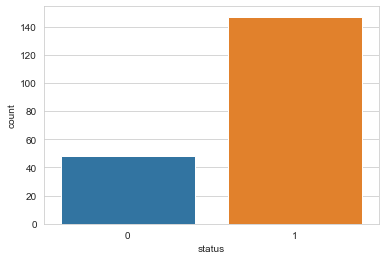

In [19]:
sns.countplot(data=main_df, x='status')

**Observations**
- 75% of the total rows have Parkinson's disease
- 25% of the total rows are healthy
- Dataset is not well-balanced

## 5. Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc (5 points)

### Separate independent and dependent variables

In [20]:
main_df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [21]:
independent_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

X = main_df[independent_features]
y = main_df['status'] 

In [22]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

### Scale the dataset

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

scaler_result = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaler_result, columns=list(X.columns))
scaled_X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.172448,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.279424,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.219848,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.233785,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.286852,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611


### Understand correlation

In [25]:
# function to plot a heatmap
def plot_correlation(df):
    corr = df.corr()
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr, annot=True)

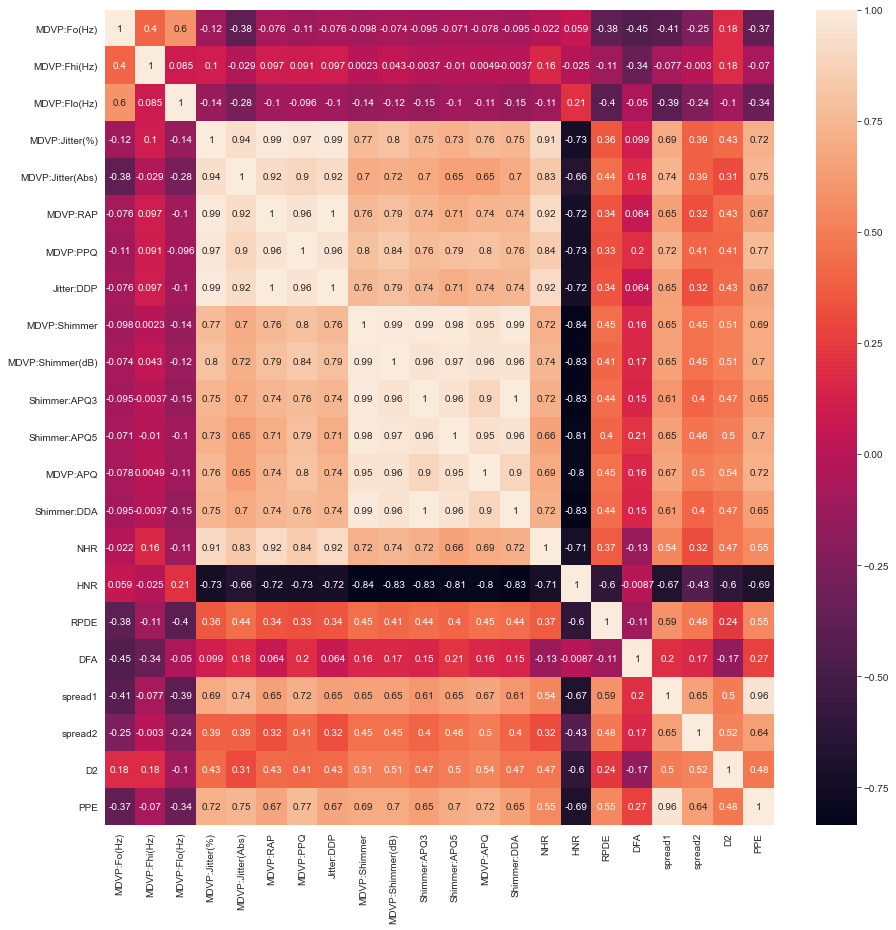

In [26]:
plot_correlation(scaled_X)

**Observations**

**It is observed that there are many features that are highly correlated to each other**

- MDVP:Jitter(Abs) and MDVP:Jitter(%) are highly correlated (94%)
- MDVP:RAP and MDVP:Jitter(%) are highly correlated (99%)
- MDVP:PPQ and MDVP:Jitter(%) are highly correlated (97%)
- Jitter:DDP and MDVP:Jitter(%) are highly correlated (99%)
- NHR and MDVP:Jitter(%) are highly correlated (91%)


- MDVP:RAP and MDVP:Jitter(Abs) are highly correlated (92%)
- MDVP:PPQ and MDVP:Jitter(Abs) are highly correlated (90%)
- Jitter:DDP and MDVP:Jitter(Abs) are highly correlated (92%)


- MDVP:PPQ and MDVP:RAP are highly correlated (96%)
- Jitter:DDP and MDVP:RAP are highly correlated (100%)
- NHR and MDVP:RAP are highly correlated (92%)


- Jitter:DDP and MDVP:PPQ are highly correlated (96%)


- NHR and Jitter:DDP are highly correlated (92%)


- MDVP:Shimmer(dB) and MDVP:Shimmer are highly correlated (99%)
- Shimmer:APQ3 and MDVP:Shimmer are highly correlated (99%)
- Shimmer:APQ5 and MDVP:Shimmer are highly correlated (98%)
- MDVP:APQ and MDVP:Shimmer are highly correlated (95%)
- Shimmer:DDA and MDVP:Shimmer are highly correlated (99%)


- Shimmer:APQ3 and MDVP:Shimmer(dB) are highly correlated (96%)
- Shimmer:APQ5 and MDVP:Shimmer(dB) are highly correlated (97%)
- MDVP:APQ and MDVP:Shimmer(dB) are highly correlated (96%)
- Shimmer:DDA and MDVP:Shimmer(dB) are highly correlated (96%)


- Shimmer:APQ5 and Shimmer:APQ3 are highly correlated (96%)
- MDVP:APQ and Shimmer:APQ3 are highly correlated (90%)
- Shimmer:DDA and Shimmer:APQ3 are highly correlated (100%)


- MDVP:APQ and Shimmer:APQ5 are highly correlated (95%)
- Shimmer:DDA and Shimmer:APQ5 are highly correlated (96%)


- Shimmer:DDA and MDVP:APQ are highly correlated (90%)


- PPE and spread1 are highly correlated (96%)

In [27]:
# Some reusable functions to help me in best feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor

# get the top best features
def get_feature_scores(df):
    best_features = SelectKBest(score_func=chi2, k='all')
    fit_result = best_features.fit(df, y)

    scores_df = pd.DataFrame() 
    scores_df['Feature'] = df.columns
    scores_df['Score'] = fit_result.scores_
    return scores_df.nlargest(25, 'Score')

# get vif scores
def get_vif_scores(df):
    vif_df = pd.DataFrame()
    vif_df['Feature'] = df.columns
    vif_df['VIF Score'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_df.nlargest(25, 'VIF Score')

# function to return highly correlated columns
def get_corr_features(df, threshold):
    corr_columns = set()
    corr_matrix = df.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                col_name = corr_matrix.columns[i]
                corr_columns.add(col_name)
                
    return corr_columns

In [28]:
# get highly correlated columns in the dataset
highly_corr_features = get_corr_features(scaled_X, 0.90)
highly_corr_features

{'Jitter:DDP',
 'MDVP:APQ',
 'MDVP:Jitter(Abs)',
 'MDVP:PPQ',
 'MDVP:RAP',
 'MDVP:Shimmer(dB)',
 'NHR',
 'PPE',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:DDA'}

In [29]:
# drop columns that are highly correlated
model_X = scaled_X.drop(columns=highly_corr_features)
model_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MDVP:Fo(Hz)     195 non-null    float64
 1   MDVP:Fhi(Hz)    195 non-null    float64
 2   MDVP:Flo(Hz)    195 non-null    float64
 3   MDVP:Jitter(%)  195 non-null    float64
 4   MDVP:Shimmer    195 non-null    float64
 5   HNR             195 non-null    float64
 6   RPDE            195 non-null    float64
 7   DFA             195 non-null    float64
 8   spread1         195 non-null    float64
 9   spread2         195 non-null    float64
 10  D2              195 non-null    float64
dtypes: float64(11)
memory usage: 16.9 KB


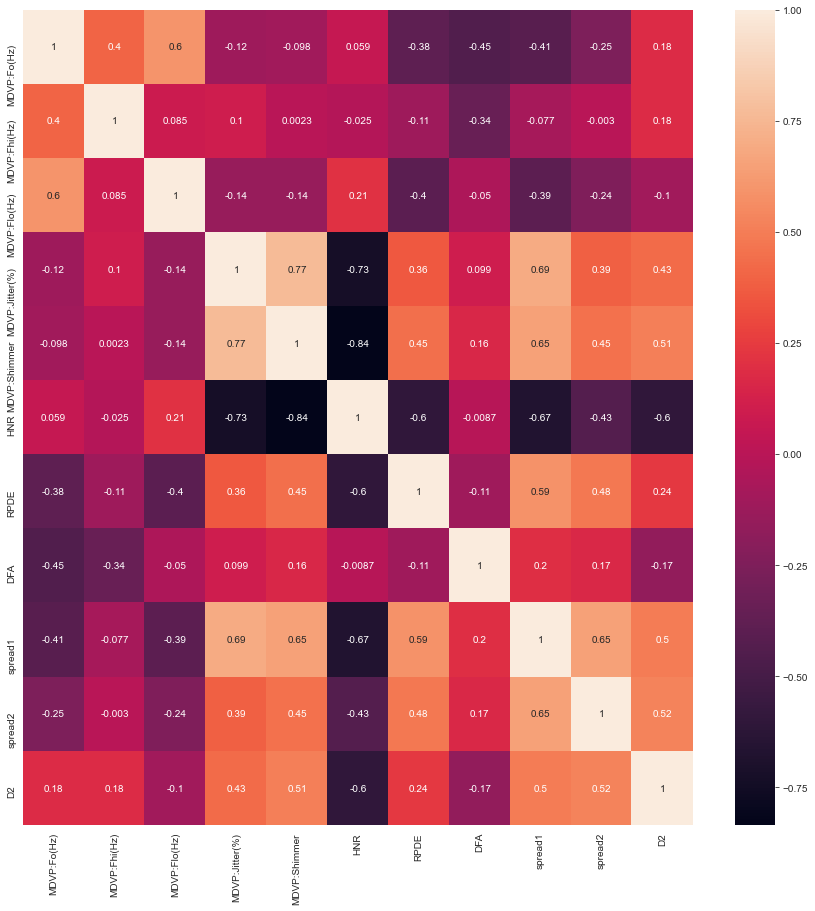

In [30]:
# plot correlation after eliminating highly correlated feature columns
plot_correlation(model_X)

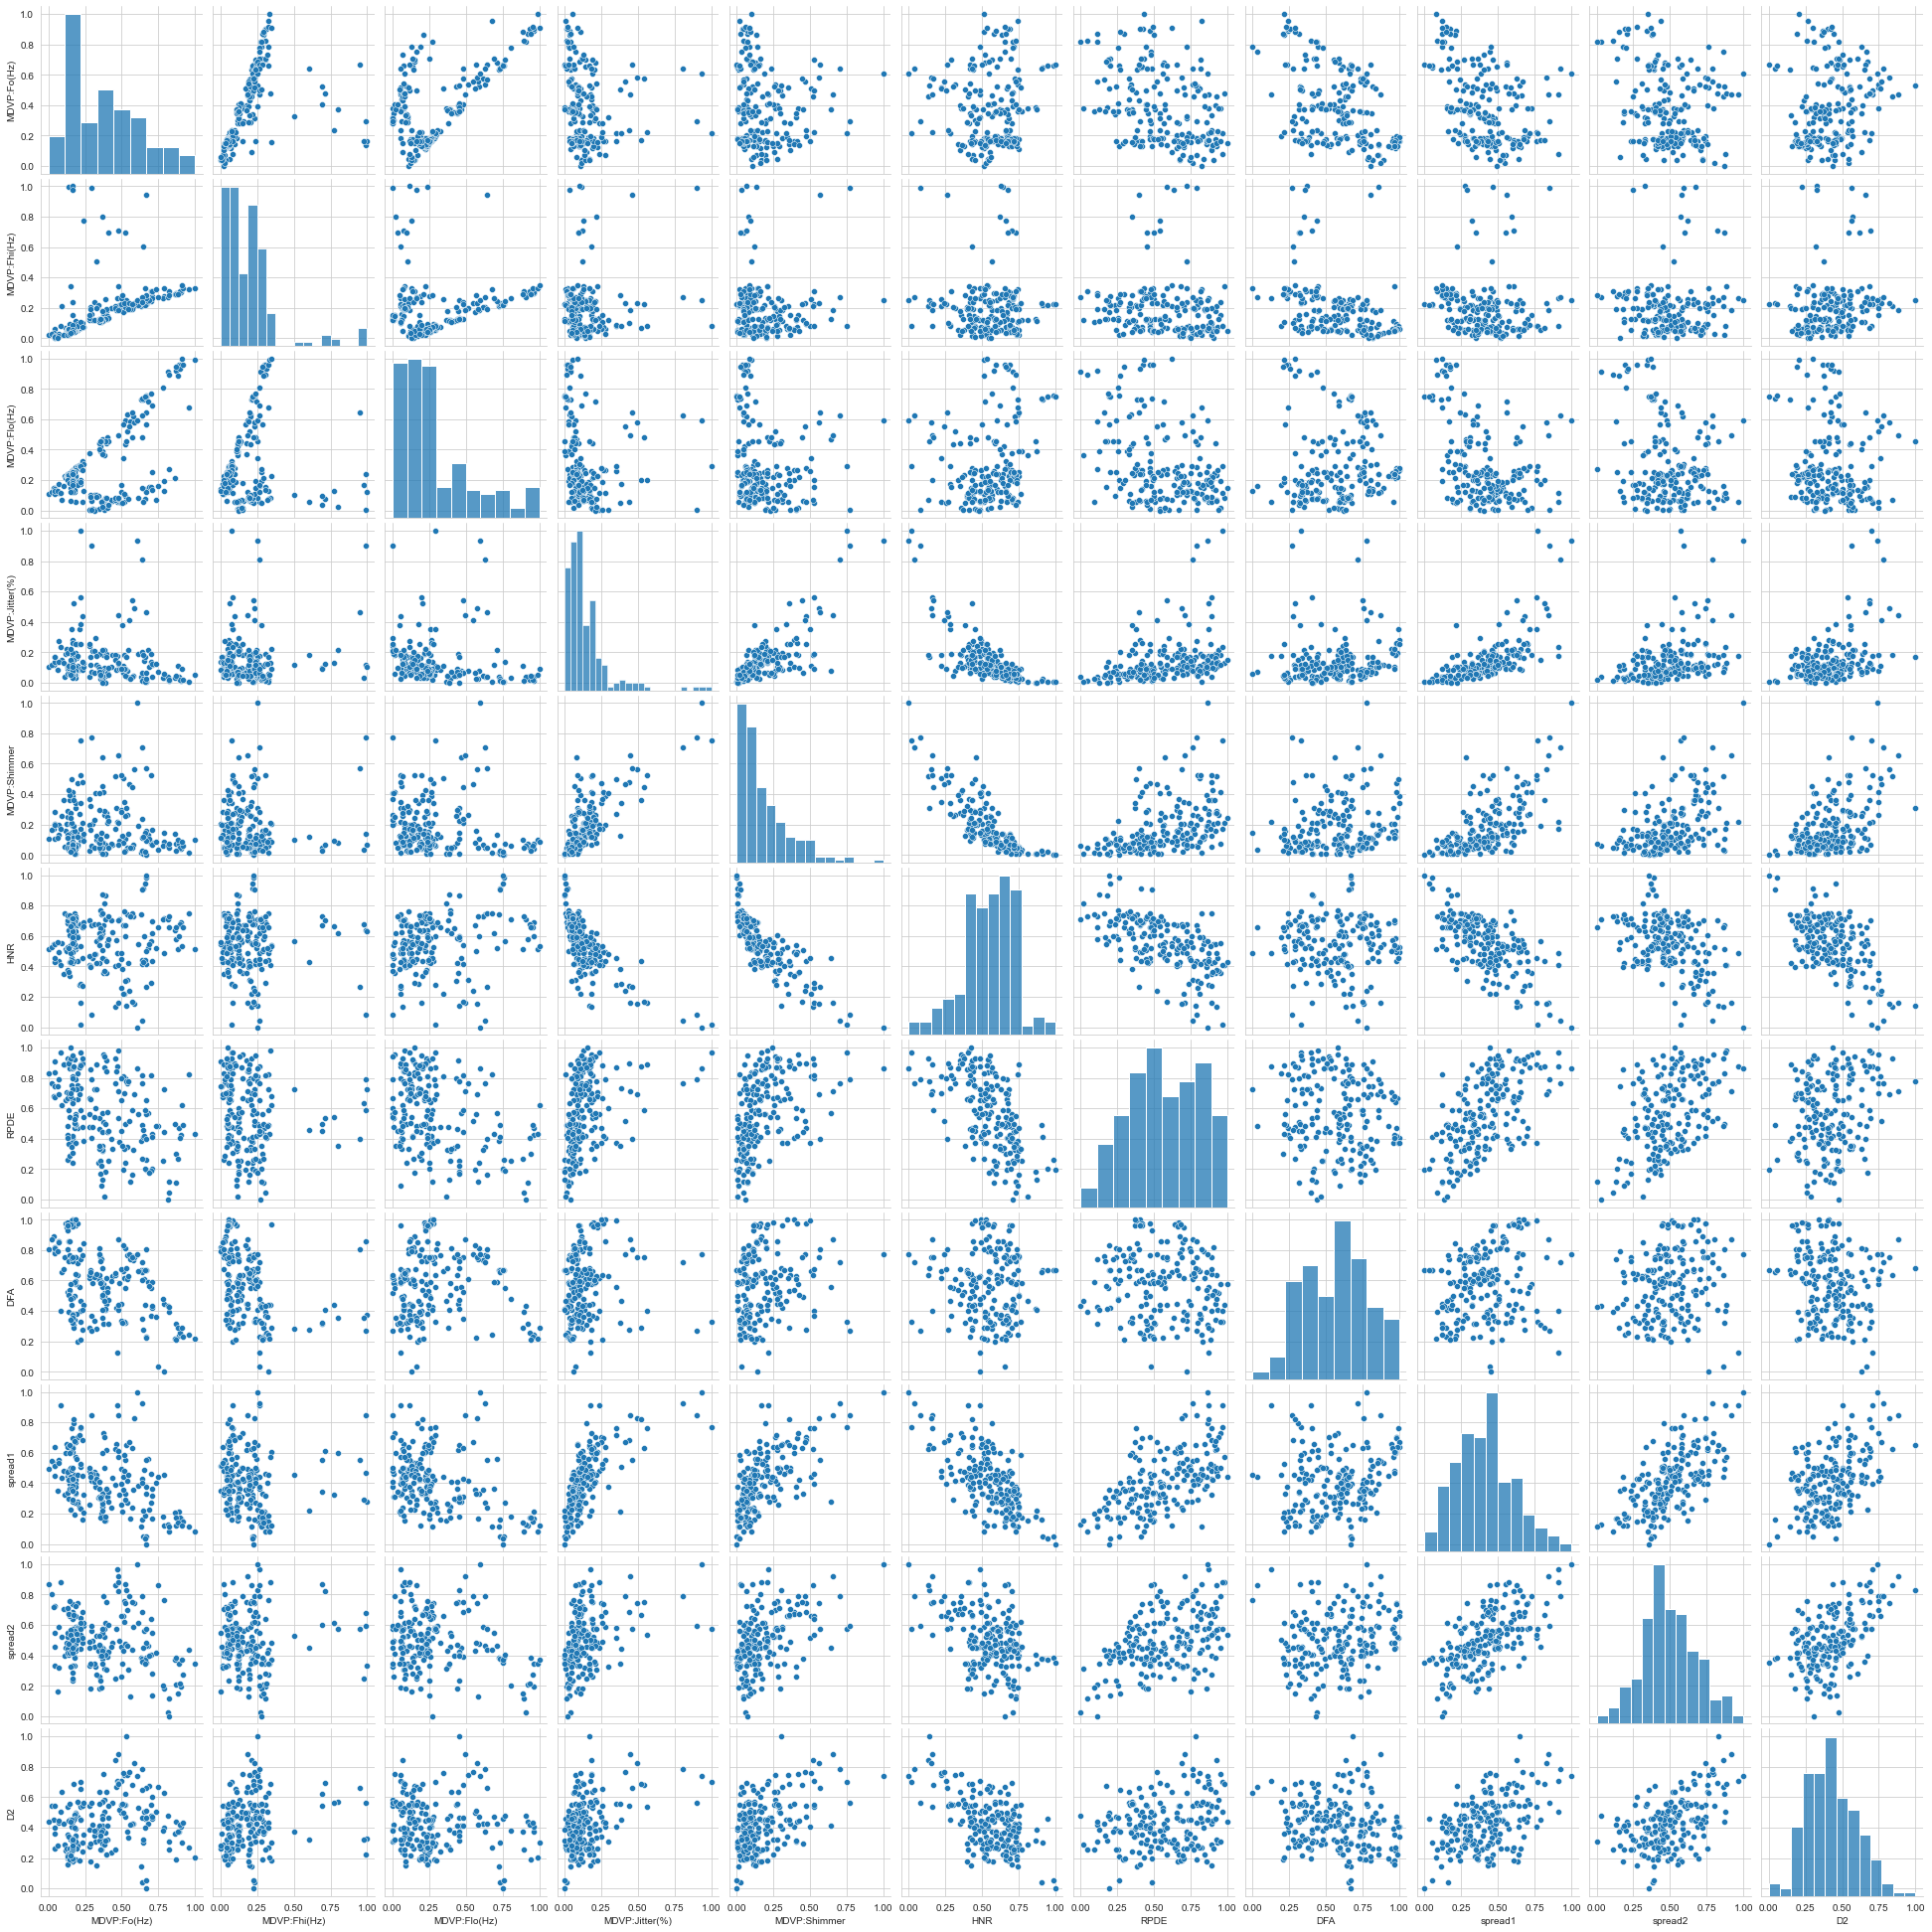

In [31]:
sns.pairplot(model_X)

## 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test) (5 points)

In [32]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(model_X, y, test_size=0.3, random_state=10)

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 49 to 9
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MDVP:Fo(Hz)     136 non-null    float64
 1   MDVP:Fhi(Hz)    136 non-null    float64
 2   MDVP:Flo(Hz)    136 non-null    float64
 3   MDVP:Jitter(%)  136 non-null    float64
 4   MDVP:Shimmer    136 non-null    float64
 5   HNR             136 non-null    float64
 6   RPDE            136 non-null    float64
 7   DFA             136 non-null    float64
 8   spread1         136 non-null    float64
 9   spread2         136 non-null    float64
 10  D2              136 non-null    float64
dtypes: float64(11)
memory usage: 12.8 KB


In [34]:
X_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
49,0.201610,0.056960,0.283257,0.082592,0.066368,0.671787,0.658261,0.716282,0.268107,0.582355,0.280769
180,0.361566,0.125123,0.456320,0.072427,0.145791,0.597090,0.223589,0.737186,0.308001,0.398326,0.374105
102,0.296271,0.988848,0.003921,0.903113,0.772777,0.083232,0.792830,0.267468,0.848949,0.595128,0.563925
151,0.608277,0.249618,0.594822,0.933609,1.000000,0.000000,0.861671,0.773041,1.000000,1.000000,0.736669
91,0.370386,0.124907,0.470655,0.079733,0.639492,0.456108,0.570410,0.558066,0.280871,0.452214,0.409984


In [35]:
y_train.count()

136

In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 59 to 173
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MDVP:Fo(Hz)     59 non-null     float64
 1   MDVP:Fhi(Hz)    59 non-null     float64
 2   MDVP:Flo(Hz)    59 non-null     float64
 3   MDVP:Jitter(%)  59 non-null     float64
 4   MDVP:Shimmer    59 non-null     float64
 5   HNR             59 non-null     float64
 6   RPDE            59 non-null     float64
 7   DFA             59 non-null     float64
 8   spread1         59 non-null     float64
 9   spread2         59 non-null     float64
 10  D2              59 non-null     float64
dtypes: float64(11)
memory usage: 5.5 KB


In [37]:
X_test.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
59,0.154356,0.345324,0.225707,0.222046,0.207322,0.537227,0.679930,0.968559,0.606735,0.484979,0.181685
5,0.187568,0.059232,0.278139,0.254130,0.342067,0.525766,0.370978,0.999128,0.672961,0.659218,0.339999
20,0.381407,0.129812,0.001762,0.213469,0.260727,0.369625,0.941607,0.517139,0.699616,0.576945,0.585632
121,0.515165,0.230968,0.106423,0.092757,0.019628,0.760993,0.334868,0.326287,0.588321,0.619838,0.548278
52,0.230934,0.073297,0.325883,0.085133,0.122604,0.660449,0.474113,0.764611,0.161376,0.482105,0.244236


In [38]:
y_test.count()

59

## 6. Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data (10 points)

In [39]:
# Import the required classifiers and metrics related api for different models under consideration 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

def init_lr_classifier():
    return LogisticRegression(solver='liblinear')

def init_knn_classifier(k):
    return KNeighborsClassifier(n_neighbors=k, weights='distance')

def init_nb_classifier():
    return GaussianNB()

def init_svc_classifier():
    return SVC(kernel='poly', probability=True)

def init_dt_classifier():
    return DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=5, random_state=10)

def init_stacking_classifier():
    # define the base models
    level0 = list()
    level0.append(('Logistic Regression', init_lr_classifier()))
    level0.append(('K-NN', init_knn_classifier(5)))
    level0.append(('Naive Bayes', init_nb_classifier()))
    level0.append(('SVM', init_svc_classifier()))
    level0.append(('Decision Tree', init_dt_classifier()))

    # define meta learner model
    level1 = init_lr_classifier()

    # define the stacking ensemble
    sc = StackingClassifier(estimators=level0, final_estimator=level1, cv=5, passthrough=True)

    return sc

def init_rf_classifier():
    return RandomForestClassifier(n_estimators=50, random_state=10)

def init_bg_classifier():
    return BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=10)


### Choosing a K Value for K-Nearest Neighbor
Let's go ahead and choose a good K Value. Choosing the right k is not easy and is subjective. Usually an odd number is chosen. A small K captures too much training noise and hence does not do well in test data. A very large K does so much smoothening that it does not manage to capture information in the training data sufficiently and hence does not do well in test data. If the number of classes is 2, many suggest a rule of thumb approach (set k=sqrt(n)), that might not be the best but does well mostly.

#### Method 1

In [40]:
scores = []
for i in range(1, 11):
    model = init_knn_classifier(i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Score')

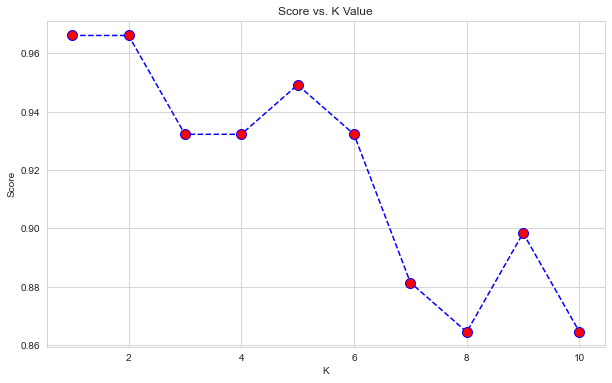

In [41]:
plt.figure(figsize=(10, 6))

plt.plot(range(1, 11), scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Score')

#### Method 2

In [42]:
error_rates = []
for i in range(1, 11):
    model = init_knn_classifier(i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error_rates.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

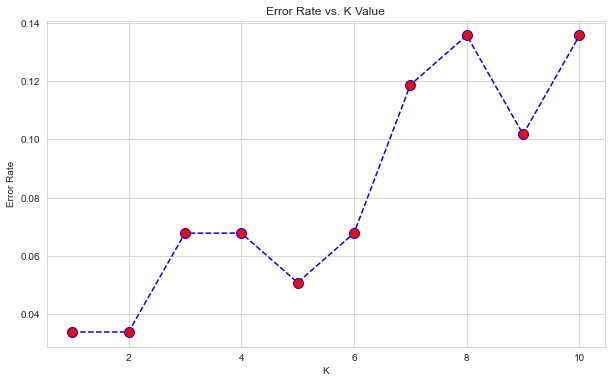

In [43]:
plt.figure(figsize=(10, 6))

plt.plot(range(1, 11), error_rates, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Observations**
- Method 1 suggests K value to be 1, 2 or 5 for high accuracy score
- Method 2 suggests K value to be 1, 2 or 5 for low error rate

**We will consider K value of 5 for optimum accuracy score and low error rate**

### Reusable functions for Train & Predict and printing metrics

In [44]:
def train_and_predict(model_name, model, X_train, y_train, X_test, y_test):
    print(f'MODEL: {model_name}\n')
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    score_train = model.score(X_train, y_train)
    print(f'Mean Accuracy Score (Train): {score_train}')

    score_test = model.score(X_test, y_test)
    print(f'Mean Accuracy Score (Test): {score_test}')
    
    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    print(f'ROC AUC Score: {roc_auc}\n')
    
    return (y_pred, roc_auc, fpr, tpr)

def show_metrics(model_name, y_test, y_pred):
    accuracy = round(accuracy_score(y_test, y_pred), 2) * 100
    print(f'Accuracy: {accuracy}\n')
    
    print('---------------------')
    print('Classification Report')
    print('---------------------')
    print(classification_report(y_test, y_pred))
    
    print('----------------')
    print('Confusion Matrix')
    print('----------------')
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='YlOrRd')

### 6.1. Logistic Regression

MODEL: Logistic Regression

Mean Accuracy Score (Train): 0.8529411764705882
Mean Accuracy Score (Test): 0.847457627118644
ROC AUC Score: 0.71875

Accuracy: 85.0

---------------------
Classification Report
---------------------
              precision    recall  f1-score   support

           0       1.00      0.44      0.61        16
           1       0.83      1.00      0.91        43

    accuracy                           0.85        59
   macro avg       0.91      0.72      0.76        59
weighted avg       0.87      0.85      0.82        59

----------------
Confusion Matrix
----------------
[[ 7  9]
 [ 0 43]]


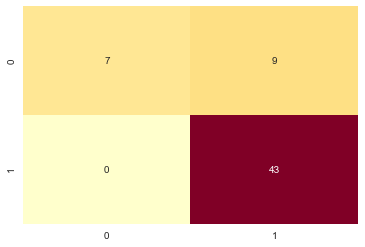

In [45]:
model = init_lr_classifier()
y_pred, roc_auc_lr, fpr_lr, tpr_lr = train_and_predict('Logistic Regression', model, X_train, y_train, X_test, y_test)
show_metrics('Logistic Regression', y_test, y_pred)

### 6.2. K-Nearest Neighbor

**We will consider K value of 5 for optimum accuracy score and low error rate**

MODEL: K-Nearest Neighbor

Mean Accuracy Score (Train): 1.0
Mean Accuracy Score (Test): 0.9491525423728814
ROC AUC Score: 0.9454941860465116

Accuracy: 95.0

---------------------
Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.98      0.95      0.96        43

    accuracy                           0.95        59
   macro avg       0.93      0.95      0.94        59
weighted avg       0.95      0.95      0.95        59

----------------
Confusion Matrix
----------------
[[15  1]
 [ 2 41]]


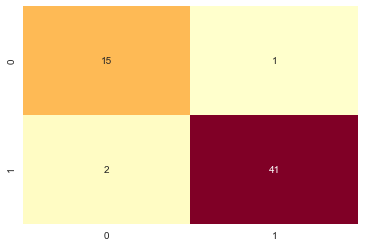

In [46]:
model = init_knn_classifier(5)
y_pred, roc_auc_knn, fpr_knn, tpr_knn = train_and_predict('K-Nearest Neighbor', model, X_train, y_train, X_test, y_test)
show_metrics('K-Nearest Neighbor', y_test, y_pred)

### 6.3. Naive Bayes

MODEL: Naive Bayes

Mean Accuracy Score (Train): 0.7426470588235294
Mean Accuracy Score (Test): 0.8983050847457628
ROC AUC Score: 0.9302325581395349

Accuracy: 90.0

---------------------
Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.86      0.92        43

    accuracy                           0.90        59
   macro avg       0.86      0.93      0.88        59
weighted avg       0.93      0.90      0.90        59

----------------
Confusion Matrix
----------------
[[16  0]
 [ 6 37]]


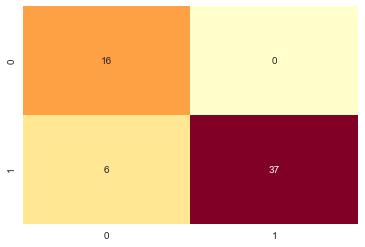

In [47]:
model = init_nb_classifier()
y_pred, roc_auc_nb, fpr_nb, tpr_nb = train_and_predict('Naive Bayes', model, X_train, y_train, X_test, y_test)
show_metrics('Naive Bayes', y_test, y_pred)

### 6.4. SVM

MODEL: SVM

Mean Accuracy Score (Train): 0.9485294117647058
Mean Accuracy Score (Test): 0.8813559322033898
ROC AUC Score: 0.8204941860465116

Accuracy: 88.0

---------------------
Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.85      0.69      0.76        16
           1       0.89      0.95      0.92        43

    accuracy                           0.88        59
   macro avg       0.87      0.82      0.84        59
weighted avg       0.88      0.88      0.88        59

----------------
Confusion Matrix
----------------
[[11  5]
 [ 2 41]]


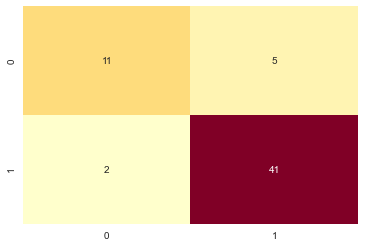

In [48]:
model = init_svc_classifier()
y_pred, roc_auc_svm, fpr_svm, tpr_svm = train_and_predict('SVM', model, X_train, y_train, X_test, y_test)
show_metrics('SVM', y_test, y_pred)

### 6.5. Decision Tree

MODEL: Decision Tree

Mean Accuracy Score (Train): 0.9485294117647058
Mean Accuracy Score (Test): 0.9661016949152542
ROC AUC Score: 0.9767441860465116

Accuracy: 97.0

---------------------
Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.95      0.98        43

    accuracy                           0.97        59
   macro avg       0.94      0.98      0.96        59
weighted avg       0.97      0.97      0.97        59

----------------
Confusion Matrix
----------------
[[16  0]
 [ 2 41]]


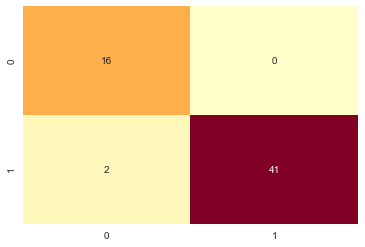

In [49]:
model = init_dt_classifier()
y_pred, roc_auc_dt, fpr_dt, tpr_dt = train_and_predict('Decision Tree', model, X_train, y_train, X_test, y_test)
show_metrics('Decision Tree', y_test, y_pred)

## 7. Train a meta-classifier and note the accuracy on test data (10 points)

### 7.1. Stacking

MODEL: Stacking

Mean Accuracy Score (Train): 1.0
Mean Accuracy Score (Test): 0.9322033898305084
ROC AUC Score: 0.8946220930232558

Accuracy: 93.0

---------------------
Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.93      0.98      0.95        43

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59

----------------
Confusion Matrix
----------------
[[13  3]
 [ 1 42]]


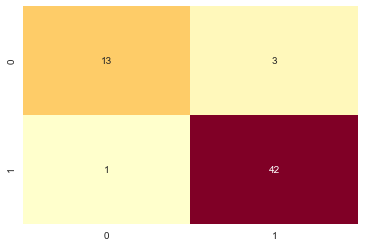

In [50]:
model = init_stacking_classifier()
y_pred, roc_auc_sc, fpr_sc, tpr_sc = train_and_predict('Stacking', model, X_train, y_train, X_test, y_test)
show_metrics('Stacking', y_test, y_pred)

## 8. Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy (10 points)

### 8.1. Random Forest

MODEL: Random Forest

Mean Accuracy Score (Train): 1.0
Mean Accuracy Score (Test): 0.9152542372881356
ROC AUC Score: 0.9026162790697674

Accuracy: 92.0

---------------------
Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.95      0.93      0.94        43

    accuracy                           0.92        59
   macro avg       0.89      0.90      0.89        59
weighted avg       0.92      0.92      0.92        59

----------------
Confusion Matrix
----------------
[[14  2]
 [ 3 40]]


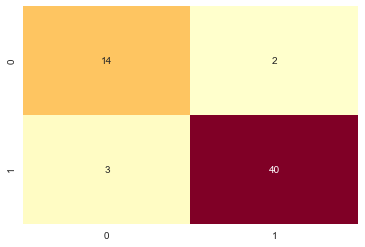

In [51]:
model = init_rf_classifier()
y_pred, roc_auc_rf, fpr_rf, tpr_rf = train_and_predict('Random Forest', model, X_train, y_train, X_test, y_test)
show_metrics('Random Forest', y_test, y_pred)

### 8.2. Bagging

MODEL: Bagging

Mean Accuracy Score (Train): 1.0
Mean Accuracy Score (Test): 0.9322033898305084
ROC AUC Score: 0.9142441860465116

Accuracy: 93.0

---------------------
Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.95      0.95      0.95        43

    accuracy                           0.93        59
   macro avg       0.91      0.91      0.91        59
weighted avg       0.93      0.93      0.93        59

----------------
Confusion Matrix
----------------
[[14  2]
 [ 2 41]]


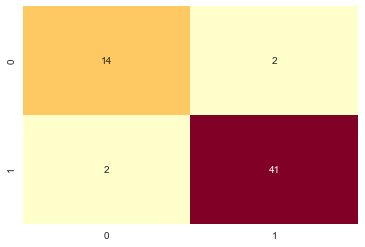

In [52]:
model = init_bg_classifier()
y_pred, roc_auc_bg, fpr_bg, tpr_bg = train_and_predict('Bagging', model, X_train, y_train, X_test, y_test)
show_metrics('Bagging', y_test, y_pred)

## 9. Compare all the models (minimum 5) and pick the best one among them (10 points)

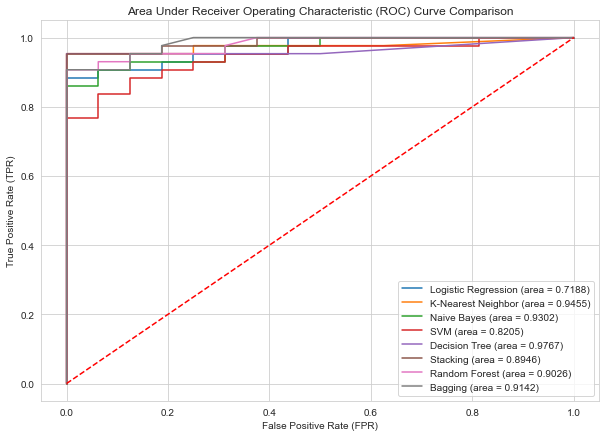

In [53]:
# Plot ROC AUC curve for all model predictions and compare them 
plt.figure(figsize=(10,7))

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.4f)' % roc_auc_lr)
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbor (area = %0.4f)' % roc_auc_knn)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (area = %0.4f)' % roc_auc_nb)
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.4f)' % roc_auc_svm)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (area = %0.4f)' % roc_auc_dt)

plt.plot(fpr_sc, tpr_sc, label='Stacking (area = %0.4f)' % roc_auc_sc)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.4f)' % roc_auc_rf)
plt.plot(fpr_bg, tpr_bg, label='Bagging (area = %0.4f)' % roc_auc_bg)
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

plt.title('Area Under Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")

**Observations & Conclusion**

We can observe the following points:

- **Logistic Regression** - Accuracy: 85%, Total Errors: 9, ROC AUC: 71.88%
- **K-NN**              - Accuracy: 95%, Total Errors: 3, ROC AUC: 94.55%
- **Naive Bayes**       - Accuracy: 90%, Total Errors: 6, ROC AUC: 93.02%
- **SVM**               - Accuracy: 88%, Total Errors: 7, ROC AUC: 82.05%
- **Decision Tree**     - Accuracy: 97%, Total Errors: 2, ROC AUC: 97.67%

- **Stacking**          - Accuracy: 93%, Total Errors: 4, ROC AUC: 89.46%
- **Random Forest**     - Accuracy: 92%, Total Errors: 5, ROC AUC: 90.26%
- **Bagging**           - Accuracy: 93%, Total Errors: 4, ROC AUC: 91.42%


Top 3 models in terms of accuracy are:

- Rank #1. Decision Tree - 97%
- Rank #2. K-NN          - 95%
- Rank #3. Bagging       - 93%
- Rank #3. Stacking      - 93%

Top 3 models in terms of least errors are:

- Rank #1. Decision Tree - 2 errors
- Rank #2. K-NN          - 3 errors
- Rank #3. Bagging       - 4 errors
- Rank #3. Stacking      - 4 errors

Top 3 models in terms of ROC AUC are:

- Rank #1. Decision Tree - 97.67%
- Rank #2. K-NN          - 94.55%
- Rank #3. Naive Bayes   - 93.02%

**_Considering the above points, we can safely conclude that Decision Tree classifier produces the best model for Parkinson's disease dataset in the current scenario. The second best model is produced by the K-NN classifier._**